In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config, DataAdapter
from toolbox_continu_inzicht.fragility_curves import (
    FragilityCurvesPiping,
)

In [2]:
path = Path.cwd() / "data_sets"
config = Config(config_path=path / "demo_fragility_multiple_curves_pipping_db.yaml")
config.lees_config()
data_adapter = DataAdapter(config=config)

```yaml
GlobalVariables:
    rootdir: "data_sets"
    moments: [-24,0,24,48]

DataAdapter:
    probabilistic_input:
        type: excel
        file: "invoer_multiple_piping_sections.xlsx"
    probabilistic_db:
        type: ci_postgresql_probablistic_pipping
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    waterlevels:
        type: csv
        file: "waterlevels.csv"
    fragility_curves:
        type: ci_postgresql_fragilitycurves_table
        database: "geoserver"
        schema: "continuinzicht_demo_realtime"
    fragility_curves_csv:
        type: csv
        file: "fragility_multiple_curves_piping.csv"
```

Werkt wel mel met excel 

In [3]:
fragility_curves_overtopping = FragilityCurvesPiping(data_adapter=data_adapter)
fragility_curves_overtopping.run(
    input=["probabilistic_input", "waterlevels"],
    output="fragility_curves_csv",
)

In [4]:
df = fragility_curves_overtopping.df_out
df = df[df["section_id"] == 1]

<Axes: xlabel='waterlevels'>

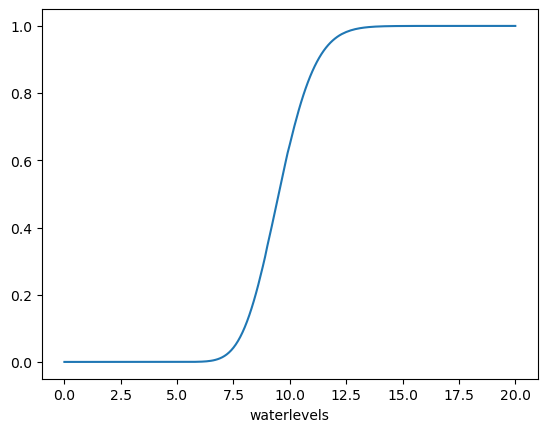

In [5]:
df.set_index("waterlevels")["failure_probability"].plot()

En met db

In [9]:
fragility_curves_overtopping.run(
    input=["probabilistic_db", "waterlevels"],
    output="fragility_curves_csv",
)

In [10]:
fragility_curves_overtopping.df_out

,waterlevels,failure_probability,section_id,scenario_id,mechanism
0,0.0,1.955538e-32,1,1,sellmeijer
1,0.1,1.020085e-31,1,1,sellmeijer
2,0.2,5.351751e-31,1,1,sellmeijer
3,0.3,2.820484e-30,1,1,sellmeijer
4,0.4,1.491263e-29,1,1,sellmeijer
...,...,...,...,...,...
1000,19.6,1.000000e+00,2,4,heave
1001,19.7,1.000000e+00,2,4,heave
1002,19.8,1.000000e+00,2,4,heave
1003,19.9,1.000000e+00,2,4,heave
